# Import all requried librarys

In [1]:
# Data manipulation and utilities
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import tensorflow as tf
from sklearn.linear_model import ElasticNet

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Handle warnings
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# Step 1
#Unzip EyeT zip with use of function and store in local machine

In [1]:
# path of the zip file to extract
zip_file_path = "EyeT.zip"

# extract all files
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Extract all files to the "EyeT" directory
    zip_file.extractall("EyeT")

In [19]:
#read and merged csv file
path = "EyeT/EyeT/" 
all_files = os.listdir(path)

df_list = [] 
for filename in all_files:
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        df_list.append(df)
        
df = pd.concat(df_list)

#Save Merged data into csv

In [20]:
df.to_csv('merged_dataset.csv', index=False)

# Step 2:  Data Analysis

#Load Mergeed Data

In [32]:
cleaned_df = pd.read_csv('merged_dataset.csv')

In [22]:
cleaned_df.shape

(4844304, 71)

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Participant name                     object 
 7   Recording name                       object 
 8   Recording date                       object 
 9   Recording date UTC                   object 
 10  Recording start time                 object 
 11  Recording start time UTC             object 
 12  Recording duration                   int64  
 13  Timeline name                        object 
 14  Recording Fixation filter name       object 
 15  Recording software version      

In [24]:
#null values
cleaned_df.isnull().sum()

Unnamed: 0                          0
Recording timestamp                 0
Computer timestamp                  0
Sensor                           3171
Project name                        0
                               ...   
Fixation point Y              2273158
Fixation point X (MCSnorm)    2493153
Fixation point Y (MCSnorm)    2493153
Mouse position X              4792191
Mouse position Y              4792191
Length: 71, dtype: int64

In [25]:
#categorial columns
data_types = cleaned_df.dtypes
categorical_columns = []
for column in cleaned_df.columns:
    if data_types[column] == 'object':
        categorical_columns.append(column)

categorical_columns

['Sensor',
 'Project name',
 'Export date',
 'Participant name',
 'Recording name',
 'Recording date',
 'Recording date UTC',
 'Recording start time',
 'Recording start time UTC',
 'Timeline name',
 'Recording Fixation filter name',
 'Recording software version',
 'Recording monitor latency',
 'Event',
 'Event value',
 'Gaze direction left X',
 'Gaze direction left Y',
 'Gaze direction left Z',
 'Gaze direction right X',
 'Gaze direction right Y',
 'Gaze direction right Z',
 'Pupil diameter left',
 'Pupil diameter right',
 'Validity left',
 'Validity right',
 'Eye position left X (DACSmm)',
 'Eye position left Y (DACSmm)',
 'Eye position left Z (DACSmm)',
 'Eye position right X (DACSmm)',
 'Eye position right Y (DACSmm)',
 'Eye position right Z (DACSmm)',
 'Gaze point left X (DACSmm)',
 'Gaze point left Y (DACSmm)',
 'Gaze point right X (DACSmm)',
 'Gaze point right Y (DACSmm)',
 'Gaze point X (MCSnorm)',
 'Gaze point Y (MCSnorm)',
 'Gaze point left X (MCSnorm)',
 'Gaze point left Y (M

In [26]:
cleaned_df.describe()#descriptive statistics for a Data

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,4.844304e+06,4.844304e+06,4.844304e+06,4.844304e+06,4844304.0,4844304.0,4.789020e+06,4.241018e+06,4.241018e+06,3.881295e+06,...,4.840684e+06,4.840684e+06,4.840684e+06,4.840684e+06,4.843551e+06,4.843551e+06,2.571146e+06,2.571146e+06,52113.000000,52113.000000
mean,9.481721e+04,5.859518e+07,6.778260e+11,1.103432e+05,1080.0,1920.0,4.747513e+09,9.135179e+02,4.532641e+02,8.470139e+02,...,2.020386e+02,-1.084277e+01,1.517771e+03,1.106384e+03,2.443453e+02,3.870550e+02,9.113709e+02,4.541373e+02,-385.692783,794.400898
std,1.084404e+05,4.183727e+07,9.456520e+11,5.010853e+04,0.0,0.0,1.306346e+10,2.956268e+02,2.935728e+02,3.007731e+02,...,1.087149e+02,1.120125e+02,6.201774e+02,4.889564e+02,5.866895e+02,5.494548e+02,2.837907e+02,2.930371e+02,442.845828,292.347874
min,3.470000e+02,2.414233e+06,5.120924e+08,1.412400e+04,1080.0,1920.0,5.040996e+07,-3.810000e+02,-2.160000e+02,-3.810000e+02,...,-7.470000e+02,-1.168000e+03,6.400000e+02,4.160000e+02,8.000000e+00,1.000000e+00,-2.890000e+02,-2.140000e+02,-1730.000000,-118.000000
25%,2.386275e+04,2.684441e+07,1.628330e+09,6.672200e+04,1080.0,1920.0,1.057263e+09,7.460000e+02,2.400000e+02,6.760000e+02,...,2.140000e+02,0.000000e+00,8.970000e+02,6.490000e+02,3.300000e+01,9.500000e+01,7.680000e+02,2.480000e+02,-504.000000,649.000000
50%,5.626000e+04,4.874914e+07,4.352990e+11,1.032830e+05,1080.0,1920.0,1.627077e+09,9.130000e+02,4.600000e+02,8.460000e+02,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,1.170000e+02,1.980000e+02,9.100000e+02,4.550000e+02,-412.000000,900.000000
75%,1.107900e+05,7.984865e+07,1.225010e+12,1.470690e+05,1080.0,1920.0,3.506508e+09,1.063000e+03,6.790000e+02,1.004000e+03,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,2.750000e+02,4.220000e+02,1.042000e+03,6.810000e+02,-255.000000,989.000000
max,5.298970e+05,2.332096e+08,4.234413e+12,2.333600e+05,1080.0,1920.0,8.072037e+10,2.304000e+03,2.374000e+03,2.304000e+03,...,4.200000e+02,0.000000e+00,3.415000e+03,3.415000e+03,1.428300e+04,5.126000e+03,2.298000e+03,2.055000e+03,1450.000000,1308.000000


In [36]:
cleaned_df['Recording date'] = pd.to_datetime(cleaned_df['Recording date'])

In [34]:
cleaned_df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,2020-09-24,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,2020-09-24,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,2020-09-24,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,2020-09-24,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,2020-09-24,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844299,31731,65940337,1666203561855,NaN,Participant0060,20.09.2021,Participant0060,Recording4,2021-09-20,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844300,31732,65945534,1666203567052,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,2021-09-20,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844301,31733,65953860,1666203575378,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,2021-09-20,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844302,31734,65962157,1666203583675,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,2021-09-20,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN


#Feature Selection

In [128]:
# Define the directory containing the CSV files
csv_directory = 'EyeT/EyeT/'

# Create an empty list to hold the resulting dataframes
dataframe_list = [] 

# Loop through each file in the directory
for filename in os.listdir(csv_directory):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Read the CSV file 
        current_dataframe = pd.read_csv(os.path.join(csv_directory, filename))
        numeric_columns = current_dataframe.select_dtypes(include=['float64', 'int64'])#Select columns
        
        # Extract the participant name from the first row
        participant_name = current_dataframe.loc[0, 'Participant name']
        
        # Drop the 'Participant name' column from the dataframe
        current_dataframe = current_dataframe.drop(columns=['Participant name'])
        
        # Add the participant name as a new column
        current_dataframe['Participant name'] = participant_name
        
        # Append the resulting dataframe to the list
        dataframe_list.append(current_dataframe)

# Concatenate all the resulting data into a single dataframe
final_df = pd.concat(dataframe_list)


In [129]:
final_df.to_csv('Eyee.csv')#make csv

#Feature Selection csv analysis

In [130]:
final_df.head(10)#data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Recording name,Recording date,Recording date UTC,Recording start time,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Participant name
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
5,3087,23451119,512124190,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
6,3088,23459447,512132518,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
7,3089,23467779,512140850,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
8,3090,23476117,512149188,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001
9,3091,23484445,512157516,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,Participant0001


In [131]:
final_df.info()#Details

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4844304 entries, 0 to 7309
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Recording name                       object 
 7   Recording date                       object 
 8   Recording date UTC                   object 
 9   Recording start time                 object 
 10  Recording start time UTC             object 
 11  Recording duration                   int64  
 12  Timeline name                        object 
 13  Recording Fixation filter name       object 
 14  Recording software version           object 
 15  Recording resolution height        

In [132]:
final_df.shape#raws and columns

(4844304, 71)

In [133]:
final_df.isnull().sum()#null value

Unnamed: 0                          0
Recording timestamp                 0
Computer timestamp                  0
Sensor                           3171
Project name                        0
                               ...   
Fixation point X (MCSnorm)    2493153
Fixation point Y (MCSnorm)    2493153
Mouse position X              4792191
Mouse position Y              4792191
Participant name                    0
Length: 71, dtype: int64

In [136]:
final_df.info()#result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4844304 entries, 0 to 7309
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Recording name                       object 
 7   Recording date                       object 
 8   Recording date UTC                   object 
 9   Recording start time                 object 
 10  Recording start time UTC             object 
 11  Recording duration                   int64  
 12  Timeline name                        object 
 13  Recording Fixation filter name       object 
 14  Recording software version           object 
 15  Recording resolution height        

In [137]:
final_df.describe()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,4.844304e+06,4.844304e+06,4.844304e+06,4.844304e+06,4844304.0,4844304.0,4.789020e+06,4.241018e+06,4.241018e+06,3.881295e+06,...,4.840684e+06,4.840684e+06,4.840684e+06,4.840684e+06,4.843551e+06,4.843551e+06,2.571146e+06,2.571146e+06,52113.000000,52113.000000
mean,9.481721e+04,5.859518e+07,6.778260e+11,1.103432e+05,1080.0,1920.0,4.747513e+09,9.135179e+02,4.532641e+02,8.470139e+02,...,2.020386e+02,-1.084277e+01,1.517771e+03,1.106384e+03,2.443453e+02,3.870550e+02,9.113709e+02,4.541373e+02,-385.692783,794.400898
std,1.084404e+05,4.183727e+07,9.456520e+11,5.010853e+04,0.0,0.0,1.306346e+10,2.956268e+02,2.935728e+02,3.007731e+02,...,1.087149e+02,1.120125e+02,6.201774e+02,4.889564e+02,5.866895e+02,5.494548e+02,2.837907e+02,2.930371e+02,442.845828,292.347874
min,3.470000e+02,2.414233e+06,5.120924e+08,1.412400e+04,1080.0,1920.0,5.040996e+07,-3.810000e+02,-2.160000e+02,-3.810000e+02,...,-7.470000e+02,-1.168000e+03,6.400000e+02,4.160000e+02,8.000000e+00,1.000000e+00,-2.890000e+02,-2.140000e+02,-1730.000000,-118.000000
25%,2.386275e+04,2.684441e+07,1.628330e+09,6.672200e+04,1080.0,1920.0,1.057263e+09,7.460000e+02,2.400000e+02,6.760000e+02,...,2.140000e+02,0.000000e+00,8.970000e+02,6.490000e+02,3.300000e+01,9.500000e+01,7.680000e+02,2.480000e+02,-504.000000,649.000000
50%,5.626000e+04,4.874914e+07,4.352990e+11,1.032830e+05,1080.0,1920.0,1.627077e+09,9.130000e+02,4.600000e+02,8.460000e+02,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,1.170000e+02,1.980000e+02,9.100000e+02,4.550000e+02,-412.000000,900.000000
75%,1.107900e+05,7.984865e+07,1.225010e+12,1.470690e+05,1080.0,1920.0,3.506508e+09,1.063000e+03,6.790000e+02,1.004000e+03,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,2.750000e+02,4.220000e+02,1.042000e+03,6.810000e+02,-255.000000,989.000000
max,5.298970e+05,2.332096e+08,4.234413e+12,2.333600e+05,1080.0,1920.0,8.072037e+10,2.304000e+03,2.374000e+03,2.304000e+03,...,4.200000e+02,0.000000e+00,3.415000e+03,3.415000e+03,1.428300e+04,5.126000e+03,2.298000e+03,2.055000e+03,1450.000000,1308.000000


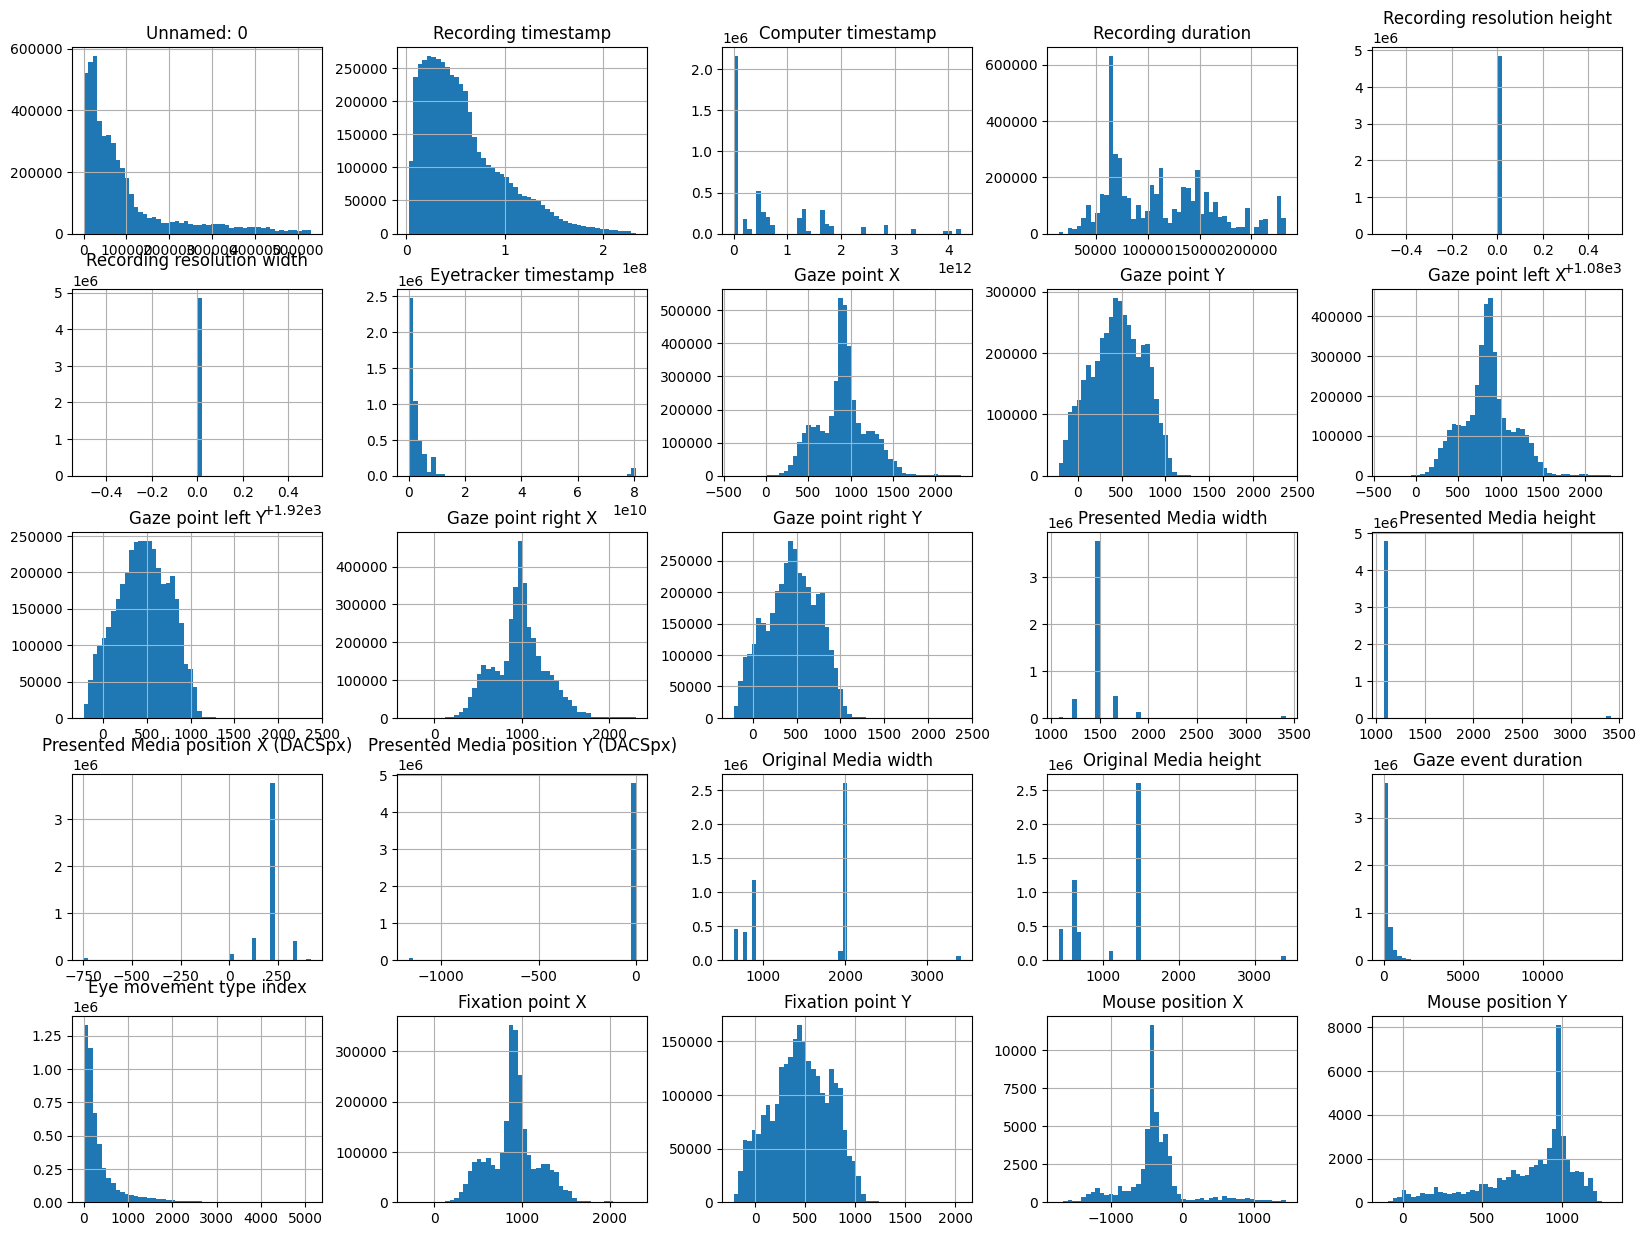

In [138]:
_ = final_df.hist(bins=50, figsize=(20,15))#histogram


# Step 3

#unzip Questionnairezip file

In [ ]:
# path of the zip file to extract
zip_file_path = "Questionnaire_datasetIA.zip"

# extract all files
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Extract all files to the "EyeT" directory
    zip_file.extractall("Questionnaire_datasetIA")

#Compared Merged Csv with Questionnaries files for Empathy Score

In [139]:
score_df_file_path = pd.read_csv('Questionnaire_datasetIA/Questionnaire_datasetIB.csv', encoding='ISO-8859-1')
score_df_file_path.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


In [140]:
score_df_file_path = score_df_file_path.rename(columns={'Participant nr': 'Participant name'})# rename the columns
score_df_file_path.head()

,Participant name,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


In [141]:
# read the first CSV file into a DataFrame
df1 = pd.read_csv('Eyee.csv')

#Coverting participant name from Participant0001 to 1 etc 
participant_dict = {}
for i in range(1, 61):
    participant_dict[f"Participant{i:04d}"] = i

df1["Participant name"] = df1["Participant name"].map(participant_dict)
df1


,Unnamed: 0.1,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Recording name,Recording date,Recording date UTC,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Participant name
0,0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1
1,1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1
2,2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1
3,3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1
4,4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844299,7305,31731,65940337,1666203561855,NaN,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60
4844300,7306,31732,65945534,1666203567052,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60
4844301,7307,31733,65953860,1666203575378,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60
4844302,7308,31734,65962157,1666203583675,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60


In [142]:
df1['Participant name'] = df1['Participant name'].astype(str)
score_df_file_path['Participant name'] = score_df_file_path['Participant name'].astype(str)

#Merge the two datasets based on the Participant name column

In [143]:
# Merge the two datasets based on the Participant name column
df1 = pd.merge(df1, score_df_file_path[['Participant name', 'Total Score extended']], on='Participant name', how='left')

# Set the timestamp column as the index of the DataFrame
df1.set_index("Recording timestamp", inplace=True)

In [144]:
df1

,Unnamed: 0.1,Unnamed: 0,Computer timestamp,Sensor,Project name,Export date,Recording name,Recording date,Recording date UTC,Recording start time,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Participant name,Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
23419315,0,3082,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
23419315,1,3083,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
23426120,2,3084,512099191,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
23434449,3,3085,512107520,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
23442782,4,3086,512115853,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65940337,7305,31731,1666203561855,NaN,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80
65945534,7306,31732,1666203567052,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80
65953860,7307,31733,1666203575378,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80


In [145]:
df1.to_csv('Modifiedd.csv', index=False)# save the renamed dataframe as a new CSV file

#  Step 4

#Load Merged csv with empathy score for data analysis

In [4]:
df1 = pd.read_csv('Modifiedd.csv')
df1

,Unnamed: 0.1,Unnamed: 0,Computer timestamp,Sensor,Project name,Export date,Recording name,Recording date,Recording date UTC,Recording start time,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Participant name,Total Score extended
0,0,3082,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
1,1,3083,512092386,NaN,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
2,2,3084,512099191,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
3,3,3085,512107520,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
4,4,3086,512115853,Eye Tracker,Test group experiment,29.10.2020,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,1,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844299,7305,31731,1666203561855,NaN,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80
4844300,7306,31732,1666203567052,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80
4844301,7307,31733,1666203575378,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80
4844302,7308,31734,1666203583675,Eye Tracker,Participant0060,20.09.2021,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,60,80


In [5]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Computer timestamp', 'Sensor',
       'Project name', 'Export date', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Eyetracker timestamp', 'Event',
       'Event value', 'Gaze point X', 'Gaze point Y', 'Gaze point left X',
       'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
       'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Eye position left X (DACSmm)',
       'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
  

In [6]:
df1.describe()

,Unnamed: 0.1,Unnamed: 0,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y,Participant name,Total Score extended
count,4.844304e+06,4.844304e+06,4.844304e+06,4.844304e+06,4844304.0,4844304.0,4.789020e+06,4.241018e+06,4.241018e+06,3.881295e+06,...,4.840684e+06,4.840684e+06,4.843551e+06,4.843551e+06,2.571146e+06,2.571146e+06,52113.000000,52113.000000,4.844304e+06,4.844304e+06
mean,6.272220e+03,9.481721e+04,6.778260e+11,1.103432e+05,1080.0,1920.0,4.747513e+09,9.135179e+02,4.532641e+02,8.470139e+02,...,1.517771e+03,1.106384e+03,2.443453e+02,3.870550e+02,9.113709e+02,4.541373e+02,-385.692783,794.400898,2.257315e+01,1.183745e+02
std,5.049283e+03,1.084404e+05,9.456520e+11,5.010853e+04,0.0,0.0,1.306346e+10,2.956268e+02,2.935728e+02,3.007731e+02,...,6.201774e+02,4.889564e+02,5.866895e+02,5.494548e+02,2.837907e+02,2.930371e+02,442.845828,292.347874,1.858583e+01,1.742260e+01
min,0.000000e+00,3.470000e+02,5.120924e+08,1.412400e+04,1080.0,1920.0,5.040996e+07,-3.810000e+02,-2.160000e+02,-3.810000e+02,...,6.400000e+02,4.160000e+02,8.000000e+00,1.000000e+00,-2.890000e+02,-2.140000e+02,-1730.000000,-118.000000,1.000000e+00,5.300000e+01
25%,2.439000e+03,2.386275e+04,1.628330e+09,6.672200e+04,1080.0,1920.0,1.057263e+09,7.460000e+02,2.400000e+02,6.760000e+02,...,8.970000e+02,6.490000e+02,3.300000e+01,9.500000e+01,7.680000e+02,2.480000e+02,-504.000000,649.000000,5.000000e+00,1.110000e+02
50%,5.027000e+03,5.626000e+04,4.352990e+11,1.032830e+05,1080.0,1920.0,1.627077e+09,9.130000e+02,4.600000e+02,8.460000e+02,...,2.000000e+03,1.447000e+03,1.170000e+02,1.980000e+02,9.100000e+02,4.550000e+02,-412.000000,900.000000,1.900000e+01,1.230000e+02
75%,8.788000e+03,1.107900e+05,1.225010e+12,1.470690e+05,1080.0,1920.0,3.506508e+09,1.063000e+03,6.790000e+02,1.004000e+03,...,2.000000e+03,1.447000e+03,2.750000e+02,4.220000e+02,1.042000e+03,6.810000e+02,-255.000000,989.000000,3.800000e+01,1.280000e+02
max,2.754400e+04,5.298970e+05,4.234413e+12,2.333600e+05,1080.0,1920.0,8.072037e+10,2.304000e+03,2.374000e+03,2.304000e+03,...,3.415000e+03,3.415000e+03,1.428300e+04,5.126000e+03,2.298000e+03,2.055000e+03,1450.000000,1308.000000,6.000000e+01,1.510000e+02


# Visual Analyis

#histogram of a column called "Recording duration"

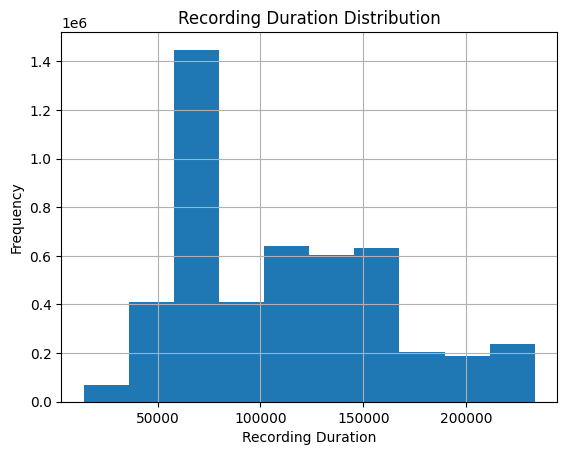

In [7]:
df1['Recording duration'].hist()
plt.title('Recording Duration Distribution')
plt.xlabel('Recording Duration')
plt.ylabel('Frequency')
plt.show()


#Scatter plot between `Gaze point X` and `Gaze point Y`

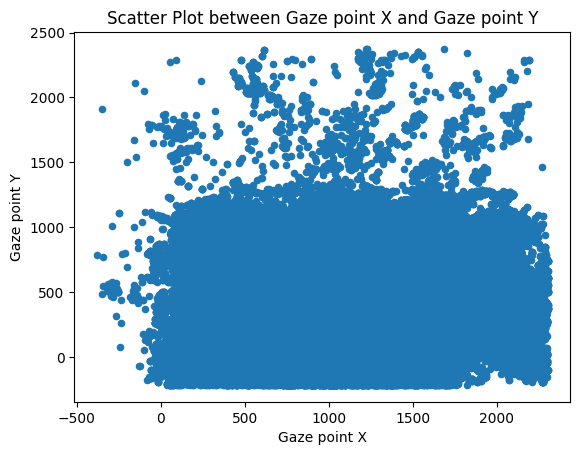

              Gaze point X  Gaze point Y
Gaze point X      1.000000     -0.099854
Gaze point Y     -0.099854      1.000000


In [9]:
# Scatter plot between `Gaze point X` and `Gaze point Y`
df1.plot.scatter(x='Gaze point X', y='Gaze point Y')
plt.title('Scatter Plot between Gaze point X and Gaze point Y')
plt.show()

# Correlation between `Gaze point X` and `Gaze point Y`
print(df1[['Gaze point X', 'Gaze point Y']].corr())


#correlation_matrix

<AxesSubplot: >

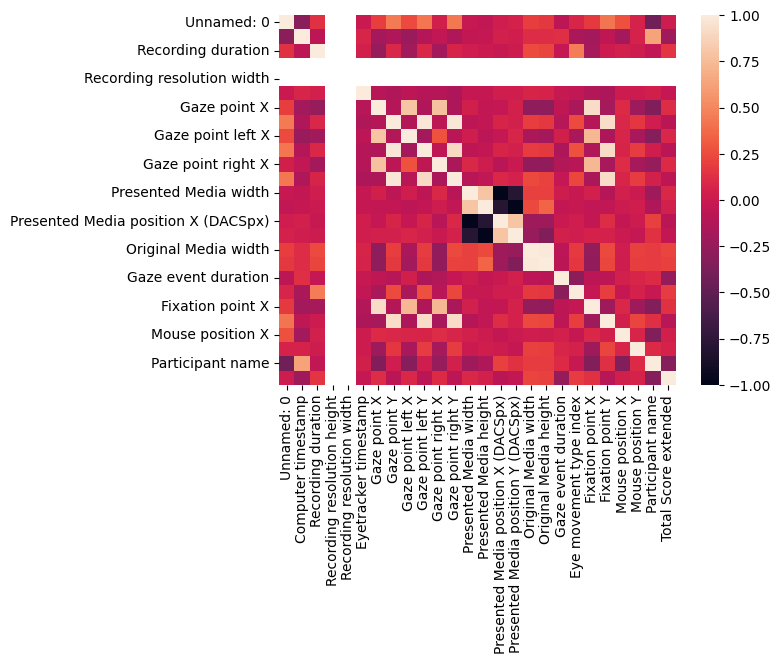

In [ ]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix)

<AxesSubplot: xlabel='Eye movement type index', ylabel='Gaze event duration'>

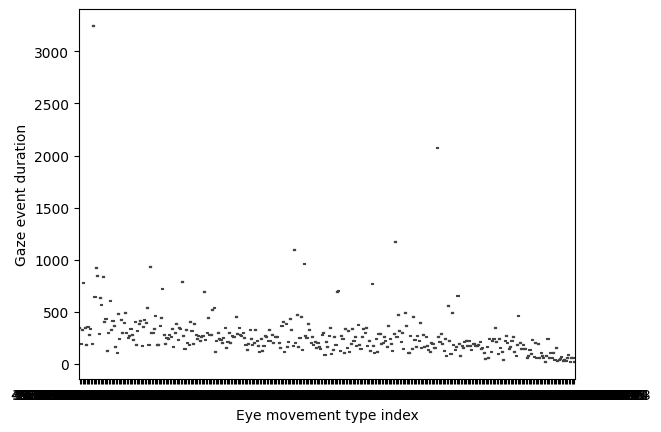

In [ ]:
sns.boxplot(x='Eye movement type index', y='Gaze event duration', data=df1)

# Step 5

#  Machine Learning Model

In this section, we preprocess the dataset from 'Modified.csv' for empathy score prediction. We focus on specific gaze and movement metrics, also add a new feature 'gaze_distance' to capture the disparity between left and right eye gaze points, and address missing values by imputation. After standardizing the features to ensure consistent scale, we split the data into training and testing sets, preparing it for subsequent machine learning modeling.

#Load Csv and Splitting the data

In [6]:
# Load the data from 'Modified.csv' into a DataFrame
df1 = pd.read_csv('Modifiedd.csv')

# Select only the specified columns
selected_columns = [
    'Recording duration',
    'Gaze point Y', 'Gaze point left X', 'Gaze point left Y',
    'Gaze point right X', 'Gaze point right Y', 'Gaze event duration',
    'Eye movement type index', 'Fixation point X', 'Fixation point Y',
    'Mouse position X', 'Mouse position Y', 'Participant name',
    'Total Score extended'
]
df1 = df1[selected_columns]

# Define the input features (X) and target variable (y)
X = df1.drop(columns=['Total Score extended', 'Participant name'])
y = df1['Total Score extended']
participants = df1['Participant name']

# Add the 'gaze_distance' feature
X['gaze_distance'] = np.sqrt((X['Gaze point left X'] - X['Gaze point right X'])**2 + (X['Gaze point left Y'] - X['Gaze point right Y'])**2)

# Drop the columns used to calculate 'gaze_distance'
X.drop(columns=['Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y'], inplace=True)

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Splitting the data
X_train, X_test, y_train, y_test, participants_train, participants_test = train_test_split(X_scaled_df, y, participants, test_size=0.2)


# M1: Linear Regression

#Train the linear regression model

In [7]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Test the models on the testing set
linear_predictions = linear_model.predict(X_test)

# Evaluate the models
linear_r_squared = linear_model.score(X_test, y_test)
linear_mse = mean_squared_error(y_test, linear_predictions)

print("Linear Regression:")
print("R^2 score:", linear_r_squared)
print(f"Mean Squared Error on Test Data: {linear_mse}\n")


Linear Regression:
R^2 score: 0.05848501034140241
Mean Squared Error on Test Data: 286.41928381254024



#Predicted Empathy Scores for Each Participant in Test Data

In [8]:
# Predicted Empathy Scores for Each Participant in Test Data
linear_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,
    'Predicted Empathy Score': linear_predictions
})
print("Linear Regression Predicted Scores:")
print(linear_predicted_scores)

Linear Regression Predicted Scores:
         Participant name  Predicted Empathy Score
3914541                 2               126.606019
4680129                38               115.503079
3653166                 9               119.081173
1973475                 3               121.932803
3429057                 3               120.492126
...                   ...                      ...
1478531                31               123.421244
580678                 13               120.295664
311324                  9               121.760262
726671                 17               117.985807
16117                   3               118.781178

[968861 rows x 2 columns]


#Graphical Analysis

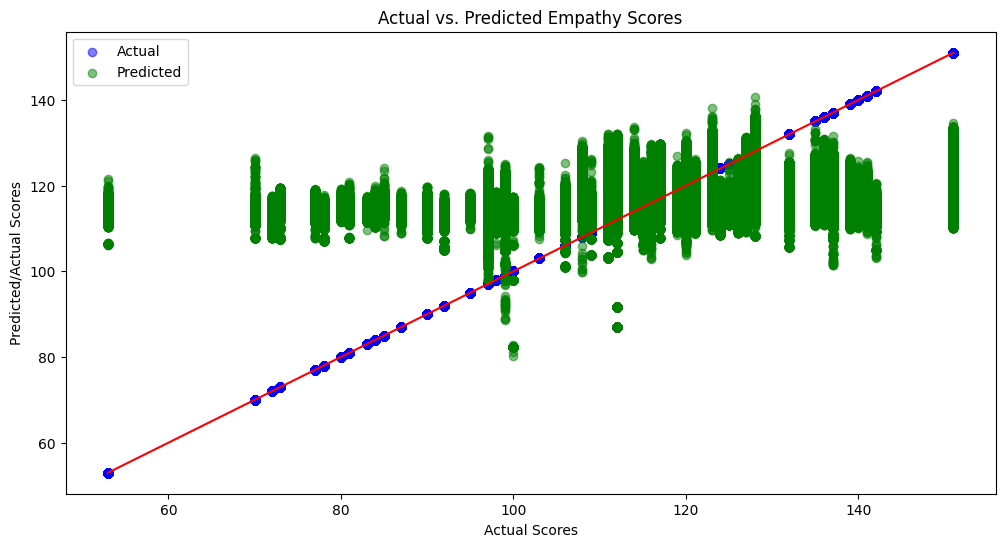

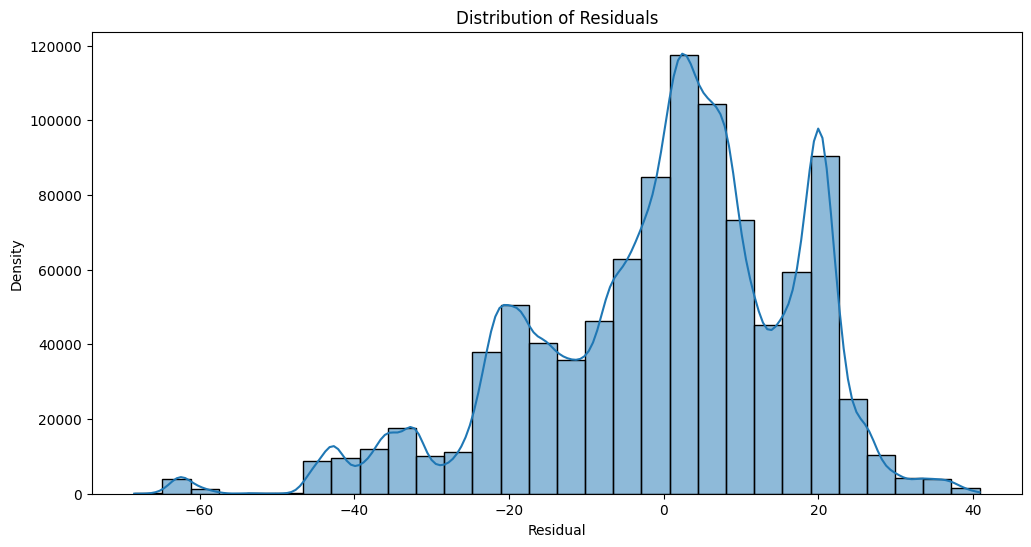

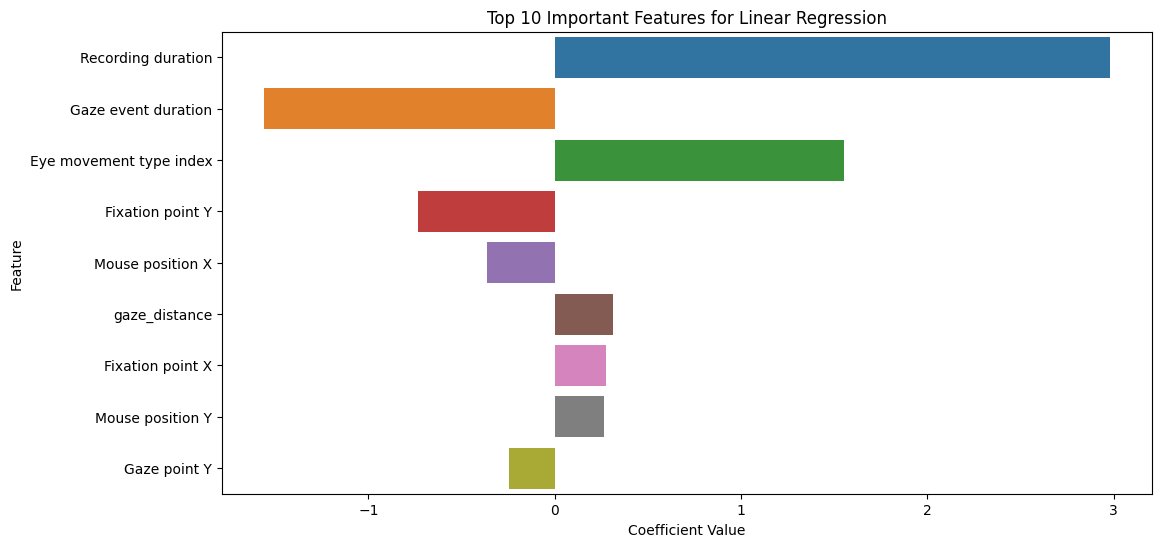


The Pearson correlation coefficient between the actual and predicted empathy scores is approximately 0.24.
The features, in order of their importance, are:
1. Recording duration
2. Gaze event duration
3. Eye movement type index
4. Fixation point Y
5. Mouse position X



In [11]:

# Actual vs. Predicted Scores scatter plot with separate colors
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, linear_predictions, alpha=0.5, label='Predicted', color='green')
plt.title('Actual vs. Predicted Empathy Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot
residuals = y_test - linear_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# Extract coefficients
coefficients = linear_model.coef_

# Create a DataFrame for coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient (Importance)': coefficients
})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient (Importance)'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient (Importance)', y='Feature', data=feature_importance.head(10))  # Top 10 features
plt.title('Top 10 Important Features for Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Convert numpy array to pandas Series
linear_predictions_series = pd.Series(linear_predictions, index=y_test.index)

# Compute the Pearson correlation between actual and predicted values
correlation_lr = y_test.corr(linear_predictions_series)

# Extract the top 5 most influential features
top_features_lr = feature_importance.head(5)['Feature'].tolist()

# Create a string that lists the top 5 features
features_string = "\n".join([f"{i+1}. {feature}" for i, feature in enumerate(top_features_lr)])

# Summary
summary = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores is approximately {correlation_lr:.2f}.
The features, in order of their importance, are:
{features_string}
"""
print(summary)

# M2: Decision Tree Regressor

In [7]:
# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Test the models on the testing set
dt_predictions = dt_model.predict(X_test)

# Evaluate the models
dt_r_squared = dt_model.score(X_test, y_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

print("Decision Tree Regressor:")
print("R^2 score:", dt_r_squared)
print(f"Mean Squared Error on Test Data: {dt_mse}\n")


Decision Tree Regressor:
R^2 score: 0.9997039803888202
Mean Squared Error on Test Data: 0.08988079817435111



In [8]:
# Predicted Empathy Scores for Each Participant in Test Data using Decision Tree Regressor
dt_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,
    'Predicted Empathy Score': dt_predictions
})
print("\nDecision Tree Regressor Predicted Scores:")
print(dt_predicted_scores)


Decision Tree Regressor Predicted Scores:
         Participant name  Predicted Empathy Score
1463075                31                    108.0
1966002                 3                    123.0
4256069                 2                    127.0
4667504                36                     70.0
1124305                25                    120.0
...                   ...                      ...
1778561                37                    132.0
3909687                 2                    127.0
1893244                39                    126.0
2553681                53                    111.0
4831928                60                     80.0

[968861 rows x 2 columns]


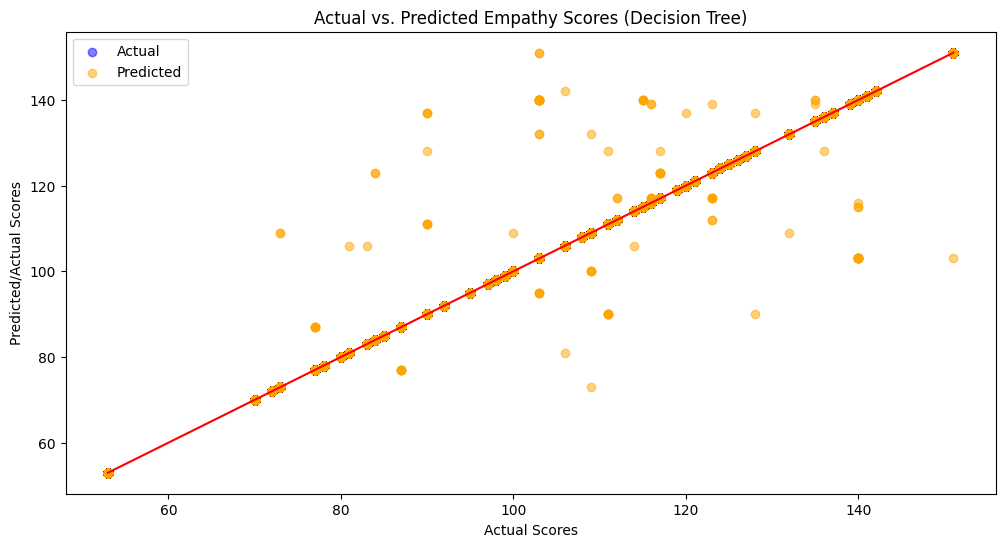

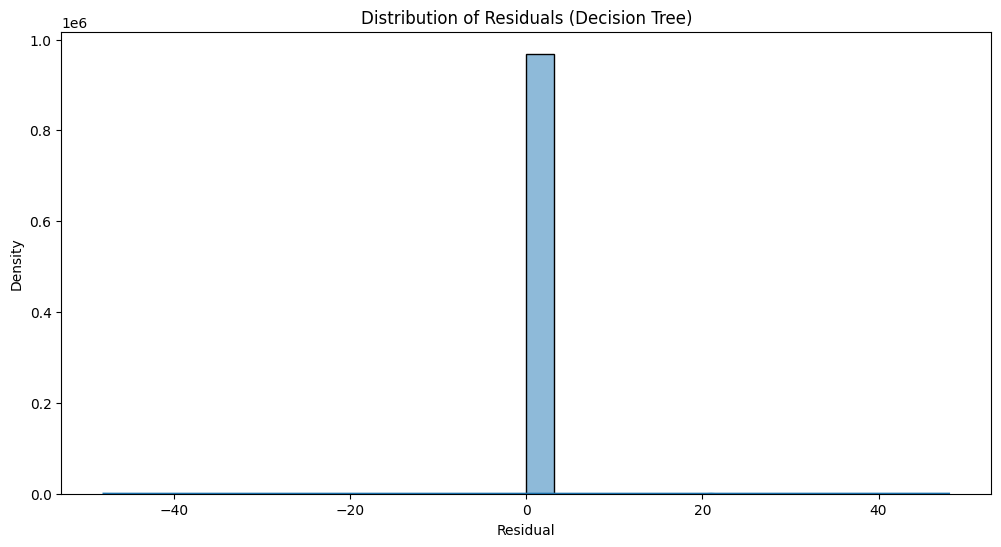

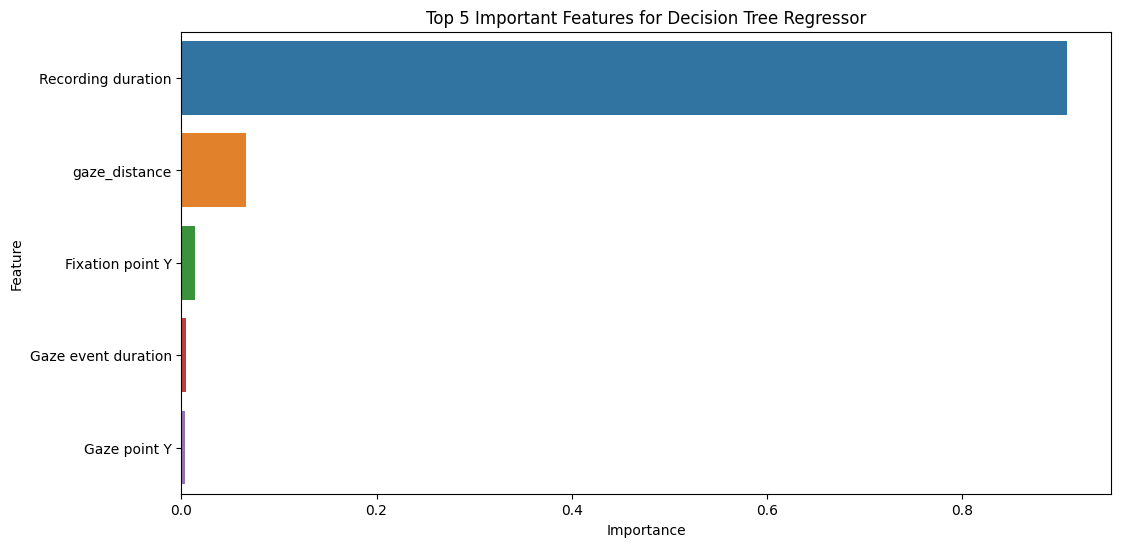


The Pearson correlation coefficient between the actual and predicted empathy scores (Decision Tree) is approximately 1.00.
The features, in order of their importance, are:
1. Recording duration
2. gaze_distance
3. Fixation point Y
4. Gaze event duration
5. Gaze point Y



In [9]:
# 1. Graphical Analysis:

# Actual vs. Predicted Scores scatter plot with separate colors for Decision Tree
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, dt_predictions, alpha=0.5, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Empathy Scores (Decision Tree)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot for Decision Tree
residuals_dt = y_test - dt_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_dt, bins=30, kde=True)
plt.title('Distribution of Residuals (Decision Tree)')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# 2. Feature Importance for Decision Tree:

# Extract feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# Plotting feature importance for Decision Tree
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt.head(5))  # Top 5 features
plt.title('Top 5 Important Features for Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Convert numpy array to pandas Series for Decision Tree predictions
dt_predictions_series = pd.Series(dt_predictions, index=y_test.index)

# Compute the Pearson correlation between actual and predicted values for Decision Tree
correlation_dt = y_test.corr(dt_predictions_series)

# Extract the top 5 most influential features for Decision Tree
top_features_dt = feature_importance_dt.head(5)['Feature'].tolist()

# Create a string that lists the top 5 features
features_string_dt = "\n".join([f"{i+1}. {feature}" for i, feature in enumerate(top_features_dt)])

# Summary for Decision Tree
summary_dt = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores (Decision Tree) is approximately {correlation_dt:.2f}.
The features, in order of their importance, are:
{features_string_dt}
"""

print(summary_dt)

# M3: Random Forest Regressor

In [10]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Test the models on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
rf_r_squared = rf_model.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("Random Forest Regressor:")
print("R^2 score:", rf_r_squared)
print(f"Mean Squared Error on Test Data: {rf_mse}\n")

Random Forest Regressor:
R^2 score: 0.999859736406103
Mean Squared Error on Test Data: 0.04258840731539402



In [11]:
# Predicted Empathy Scores for Each Participant in Test Data using Random Forest Regressor
rf_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,
    'Predicted Empathy Score': rf_predictions
})
print("\nRandom Forest Regressor Predicted Scores:")
print(rf_predicted_scores)



Random Forest Regressor Predicted Scores:
         Participant name  Predicted Empathy Score
1463075                31                    108.0
1966002                 3                    123.0
4256069                 2                    127.0
4667504                36                     70.0
1124305                25                    120.0
...                   ...                      ...
1778561                37                    132.0
3909687                 2                    127.0
1893244                39                    126.0
2553681                53                    111.0
4831928                60                     80.0

[968861 rows x 2 columns]


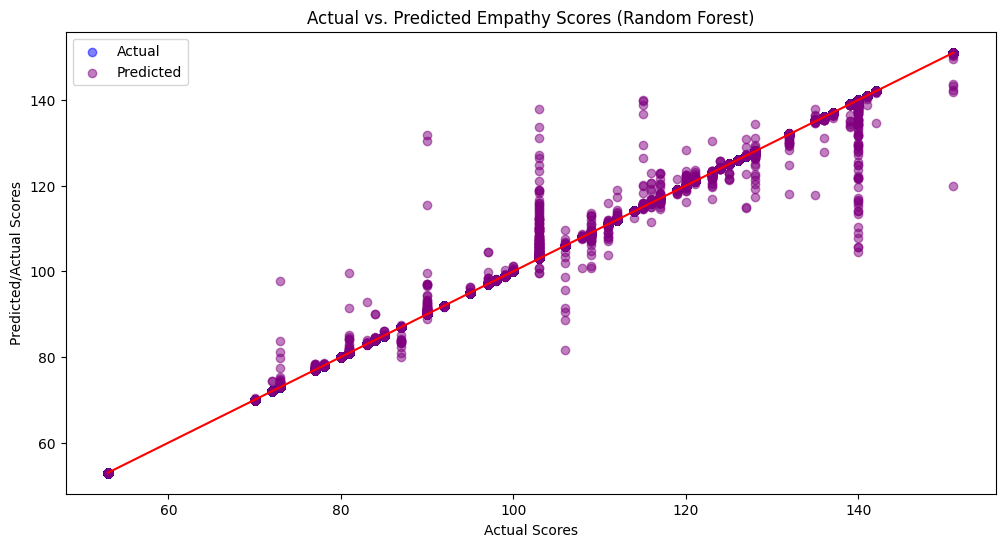

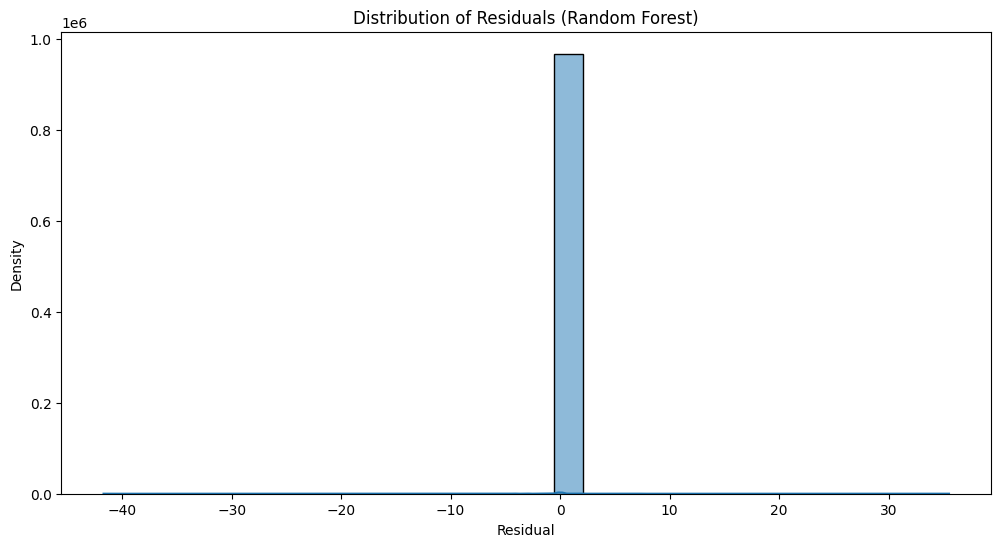

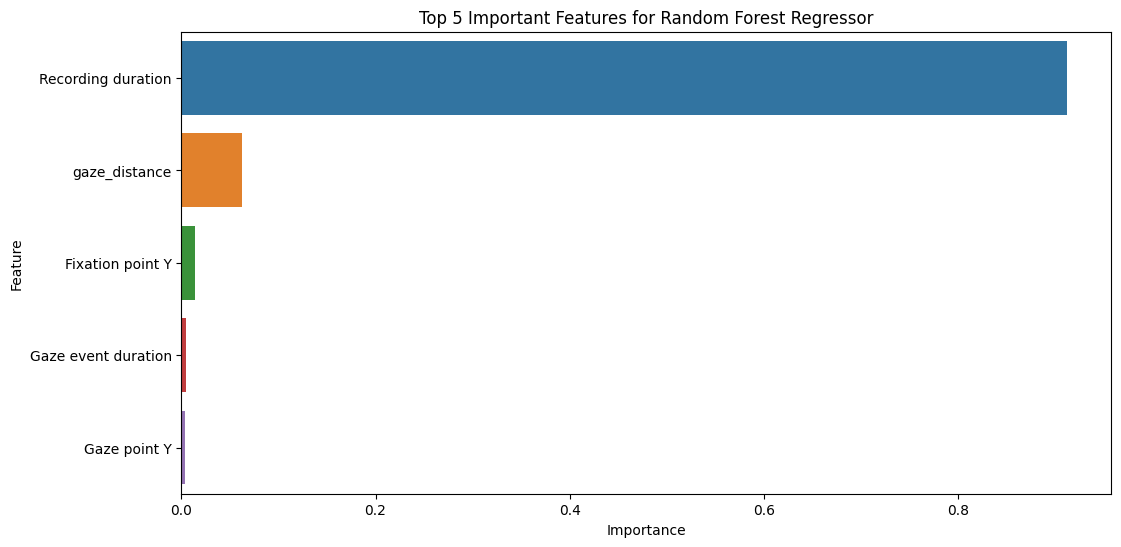


The Pearson correlation coefficient between the actual and predicted empathy scores (Random Forest) is approximately 1.00.
The features, in order of their importance, are:
1. Recording duration
2. gaze_distance
3. Fixation point Y
4. Gaze event duration
5. Gaze point Y



In [12]:
# Actual vs. Predicted Scores scatter plot for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Predicted', color='purple')
plt.title('Actual vs. Predicted Empathy Scores (Random Forest)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot for Random Forest
residuals_rf = y_test - rf_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# Extract feature importances
importances_rf = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
})

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plotting feature importance for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(5))  # Top 5 features
plt.title('Top 5 Important Features for Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Convert numpy array to pandas Series for Random Forest predictions
rf_predictions_series = pd.Series(rf_predictions, index=y_test.index)

# Compute the Pearson correlation between actual and predicted values for Random Forest
correlation_rf = y_test.corr(rf_predictions_series)

# Extract the top 5 most influential features for Random Forest
top_features_rf = feature_importance_rf.head(5)['Feature'].tolist()

# Create a string that lists the top 5 features
features_string_rf = "\n".join([f"{i+1}. {feature}" for i, feature in enumerate(top_features_rf)])

# Summary for Random Forest
summary_rf = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores (Random Forest) is approximately {correlation_rf:.2f}.
The features, in order of their importance, are:
{features_string_rf}
"""

print(summary_rf)

 # M4: Gradient Boosting

In [13]:
# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Test the model on the testing set
gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_r_squared = gb_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, gb_predictions)

print("Gradient Boosting Regressor:")
print("R^2 score:", gb_r_squared)
print(f"Mean Squared Error on Test Data: {gb_mse}\n")


Gradient Boosting Regressor:
R^2 score: 0.5643798371326252
Mean Squared Error on Test Data: 132.26788516924015



In [14]:
# Predicted Empathy Scores for Each Participant in Test Data using Gradient Boosting Regressor
gb_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,
    'Predicted Empathy Score': gb_predictions
})
print("\nGradient Boosting Regressor Predicted Scores:")
print(gb_predicted_scores)



Gradient Boosting Regressor Predicted Scores:
         Participant name  Predicted Empathy Score
1463075                31               110.608656
1966002                 3               126.615101
4256069                 2               123.153091
4667504                36                90.080695
1124305                25               123.446905
...                   ...                      ...
1778561                37               126.404813
3909687                 2               118.594484
1893244                39               130.179687
2553681                53               119.652374
4831928                60                76.736735

[968861 rows x 2 columns]


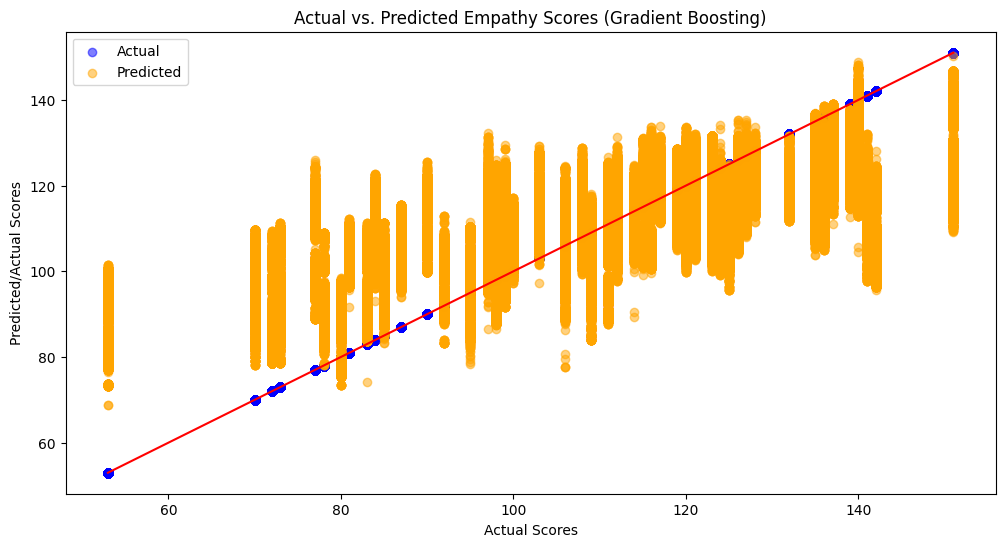

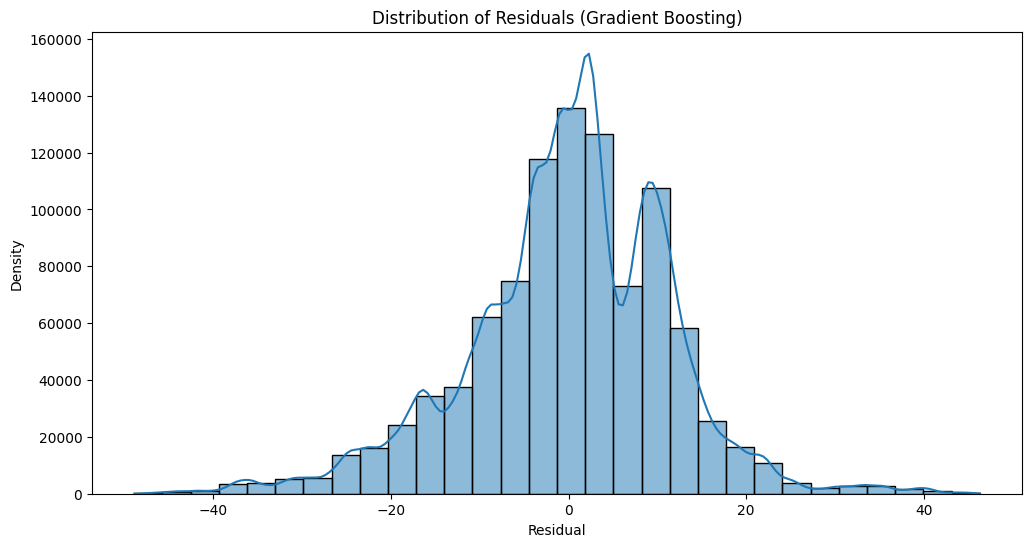

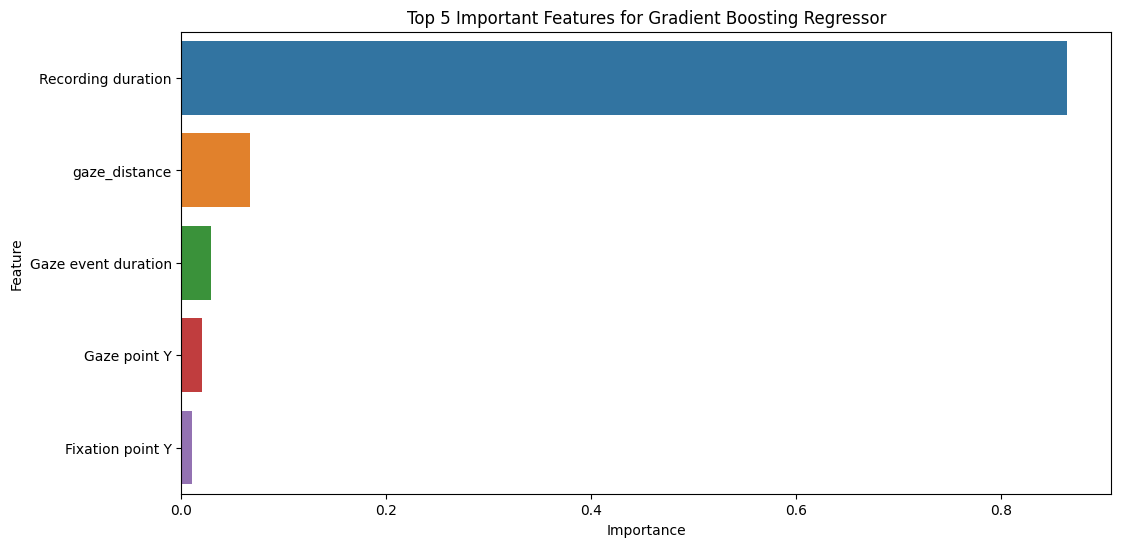


The Pearson correlation coefficient between the actual and predicted empathy scores (Gradient Boosting) is approximately 0.78.
The features, in order of their importance, are:
1. Recording duration
2. gaze_distance
3. Gaze event duration
4. Gaze point Y
5. Fixation point Y



In [15]:
# Actual vs. Predicted Scores scatter plot for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, gb_predictions, alpha=0.5, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Empathy Scores (Gradient Boosting)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot for Gradient Boosting
residuals_gb = y_test - gb_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_gb, bins=30, kde=True)
plt.title('Distribution of Residuals (Gradient Boosting)')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# Feature importances for Gradient Boosting
importances_gb = gb_model.feature_importances_
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance for Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(5))  # Top 5 features
plt.title('Top 5 Important Features for Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Compute the Pearson correlation for Gradient Boosting
correlation_gb = y_test.corr(pd.Series(gb_predictions, index=y_test.index))
top_features_gb = feature_importance_gb.head(5)['Feature'].tolist()
features_string_gb = "\n".join([f"{i+1}. {feature}" for i, feature in enumerate(top_features_gb)])
summary_gb = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores (Gradient Boosting) is approximately {correlation_gb:.2f}.
The features, in order of their importance, are:
{features_string_gb}
"""
print(summary_gb)


# M5: ElasticNet Regression

In [6]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
elastic_predictions = elastic_model.predict(X_test)

elastic_r_squared = elastic_model.score(X_test, y_test)
elastic_mse = mean_squared_error(y_test, elastic_predictions)

print("ElasticNet Regression:")
print("R^2 score:", elastic_r_squared)
print(f"Mean Squared Error on Test Data: {elastic_mse}\n")

ElasticNet Regression:
R^2 score: 0.04611838626753584
Mean Squared Error on Test Data: 289.3448510232465



In [9]:
# Create DataFrame for ElasticNet Predicted Scores
elastic_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,   # Make sure participants_test is defined and matches the test data order
    'Predicted Empathy Score': elastic_predictions
})

print("\nElasticNet Regression Predicted Scores:")
print(elastic_predicted_scores)


ElasticNet Regression Predicted Scores:
         Participant name  Predicted Empathy Score
3302719                 1               118.331623
511045                 13               121.671699
1371503                29               120.877766
930643                  1               119.982068
3874824                26               116.489433
...                   ...                      ...
3020021                 1               117.899997
3527871                 5               117.264208
3211829                 5               117.168024
518320                 13               120.911308
3424431                 3               119.889789

[968861 rows x 2 columns]


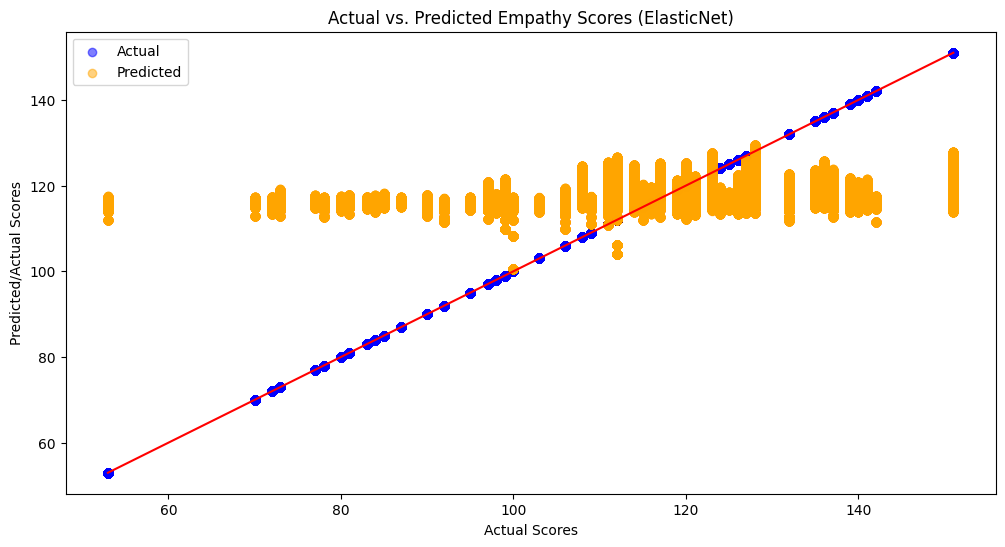

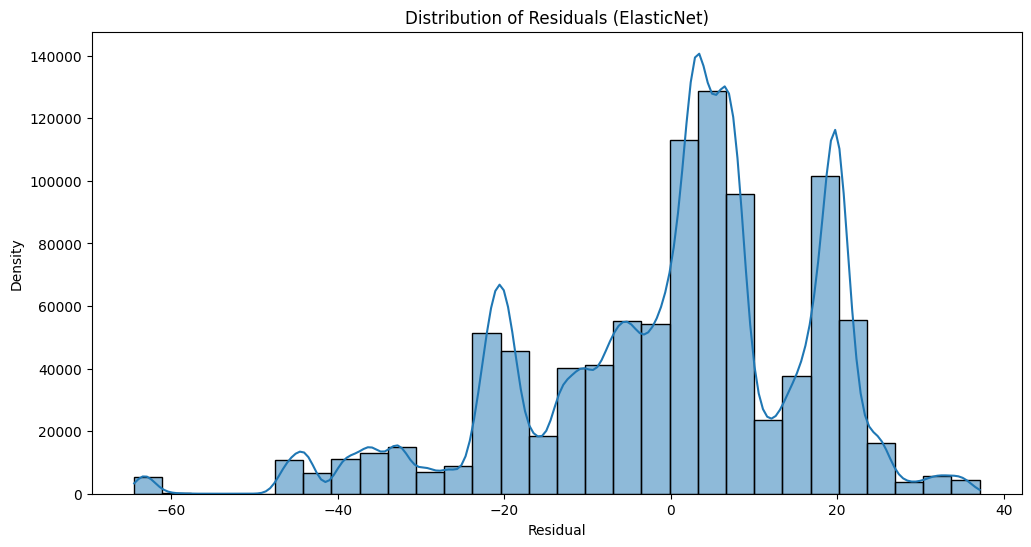

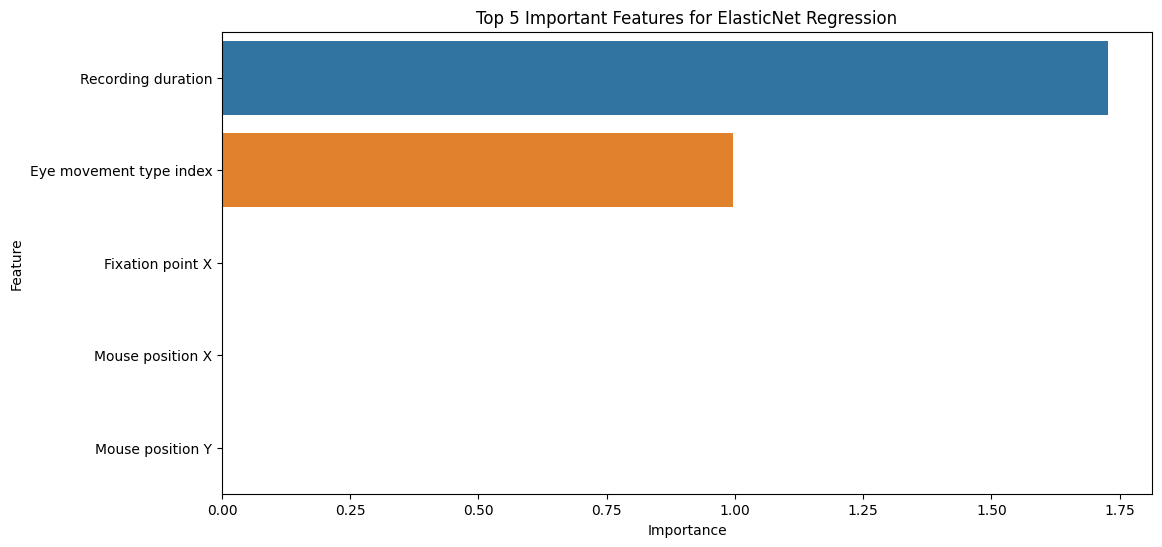


The Pearson correlation coefficient between the actual and predicted empathy scores (ElasticNet) is approximately 0.24.
The features, in order of their importance, are:
1. Recording duration
2. Eye movement type index
3. Fixation point X
4. Mouse position X
5. Mouse position Y



In [10]:
# Actual vs. Predicted Scores scatter plot for ElasticNet
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, elastic_predictions, alpha=0.5, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Empathy Scores (ElasticNet)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot for ElasticNet
residuals_en = y_test - elastic_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_en, bins=30, kde=True)
plt.title('Distribution of Residuals (ElasticNet)')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# Feature importances for ElasticNet (coefficients in the linear model)
importances_en = elastic_model.coef_

feature_importance_en = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_en
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance for ElasticNet
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_en.head(5))  # Top 5 features
plt.title('Top 5 Important Features for ElasticNet Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Compute the Pearson correlation for ElasticNet
correlation_en = y_test.corr(pd.Series(elastic_predictions, index=y_test.index))
top_features_en = feature_importance_en.head(5)['Feature'].tolist()
features_string_en = "\n".join([f"{i+1}. {feature}" for i, feature in enumerate(top_features_en)])
summary_en = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores (ElasticNet) is approximately {correlation_en:.2f}.
The features, in order of their importance, are:
{features_string_en}
"""
print(summary_en)


# M6: Neural Networks

In [7]:
# Scale input data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Test the model on the testing set
nn_predictions = model.predict(X_test_scaled).flatten()  # Flatten to make it a 1D array

# Evaluate the neural network model
nn_r_squared = r2_score(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)

print("Neural Network Regression:")
print("R^2 score:", nn_r_squared)
print(f"Mean Squared Error on Test Data: {nn_mse}\n")


30277/30277 [==============================] - 36s 1ms/step
Neural Network Regression:
R^2 score: 0.45278379684141123
Mean Squared Error on Test Data: 165.98935182415266



In [12]:
# Create DataFrame for Neural Network Predicted Scores
nn_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,   # Ensure participants_test is defined and matches the test data order
    'Predicted Empathy Score': nn_predictions
})

print("\nNeural Network Regression Predicted Scores:")
print(nn_predicted_scores)



Neural Network Regression Predicted Scores:
         Participant name  Predicted Empathy Score
3302719                 1               122.917053
511045                 13               115.622284
1371503                29               118.873138
930643                  1               125.592407
3874824                26               105.208328
...                   ...                      ...
3020021                 1               124.728699
3527871                 5               122.484169
3211829                 5               118.058983
518320                 13               115.930954
3424431                 3               118.690826

[968861 rows x 2 columns]


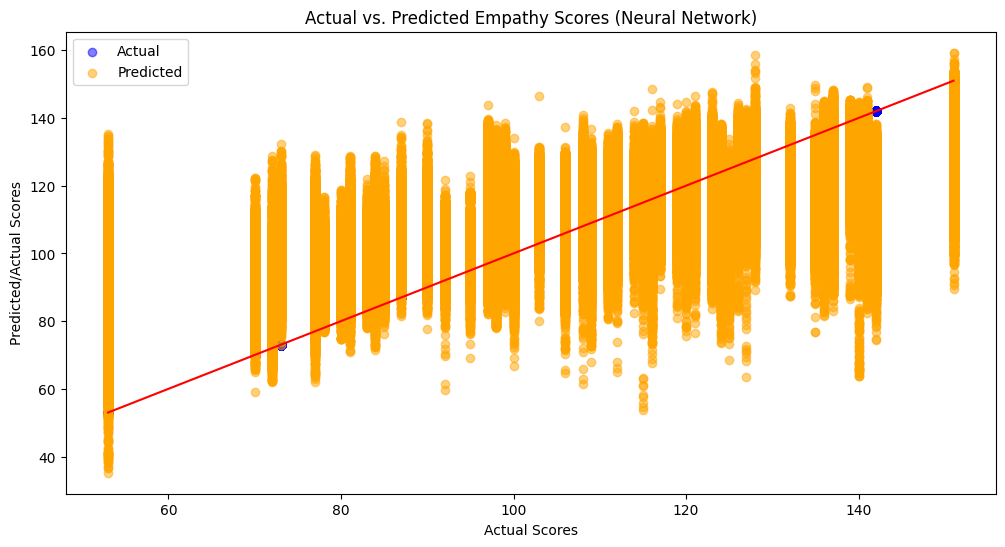

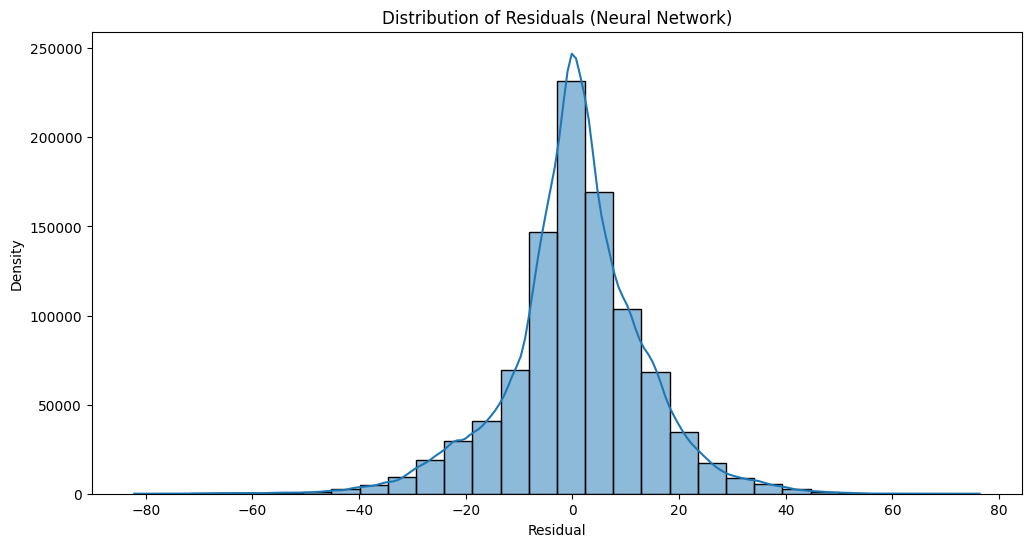


The Pearson correlation coefficient between the actual and predicted empathy scores (Neural Network) is approximately 0.67.



In [18]:
# Actual vs. Predicted Scores scatter plot for Neural Network
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, nn_predictions, alpha=0.5, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Empathy Scores (Neural Network)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot for Neural Network
residuals_nn = y_test - nn_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_nn, bins=30, kde=True)
plt.title('Distribution of Residuals (Neural Network)')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# Compute the Pearson correlation for Neural Network
correlation_nn = y_test.corr(pd.Series(nn_predictions, index=y_test.index))
summary_nn = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores (Neural Network) is approximately {correlation_nn:.2f}.
"""  # Removing feature importance section
print(summary_nn)


# M7: Support Vector Regression (SVR)

In [3]:
# Train the SVR model
svr_model = SVR(kernel='linear')  # using a linear kernel for interpretability
svr_model.fit(X_train, y_train)

# Test the model on the testing set
svr_predictions = svr_model.predict(X_test)

# Evaluate the SVR model
svr_r_squared = svr_model.score(X_test, y_test)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Support Vector Regression (SVR):")
print("R^2 score:", svr_r_squared)
print(f"Mean Squared Error on Test Data: {svr_mse}\n")

Support Vector Regression (SVR):
R^2 score: -0.13077658725938313
Mean Squared Error on Test Data: 408.1262131678042



In [ ]:
# Predicted Empathy Scores for Each Participant in Test Data using Support Vector Regression (SVR)
svr_predicted_scores = pd.DataFrame({
    'Participant name': participants_test,
    'Predicted Empathy Score': svr_predictions
})
print("\nSupport Vector Regression (SVR) Predicted Scores:")
print(svr_predicted_scores)


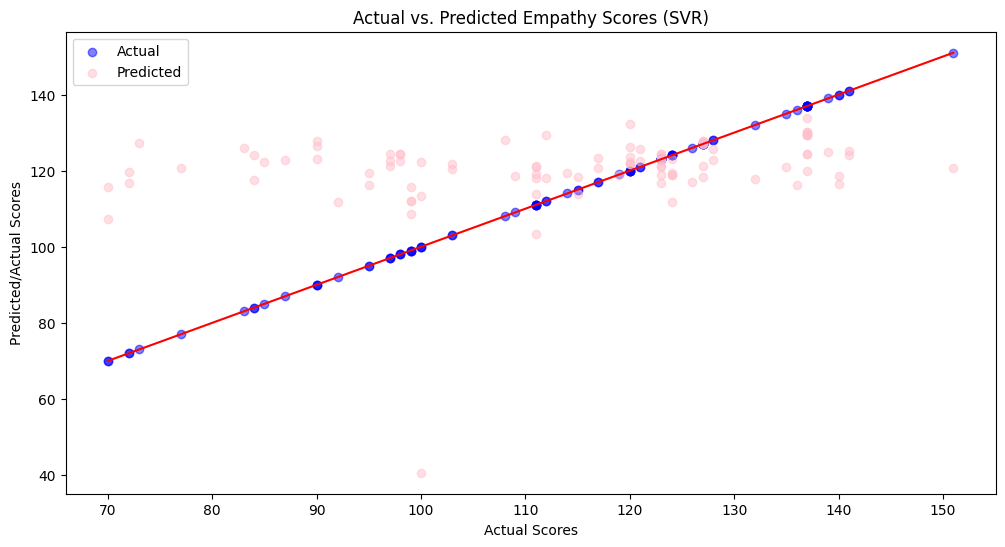

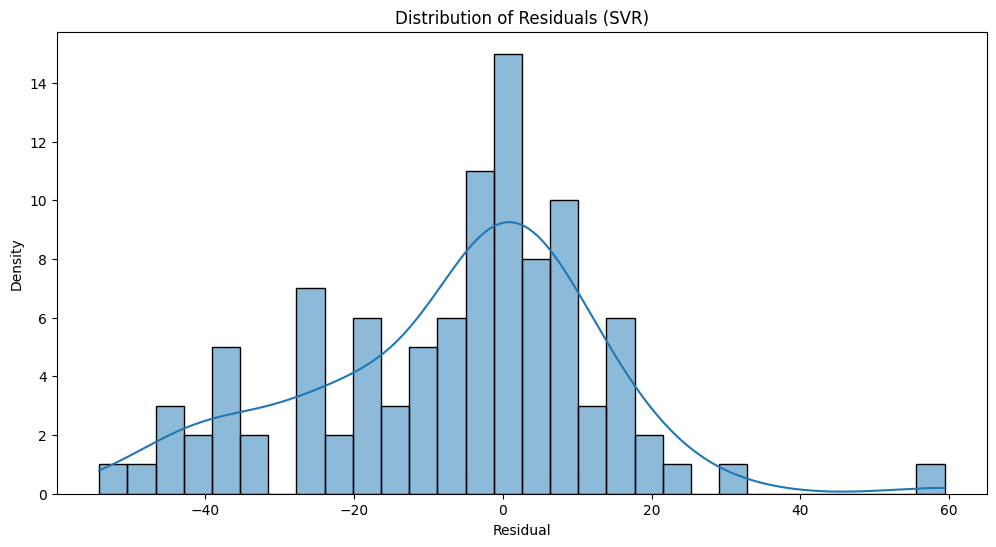

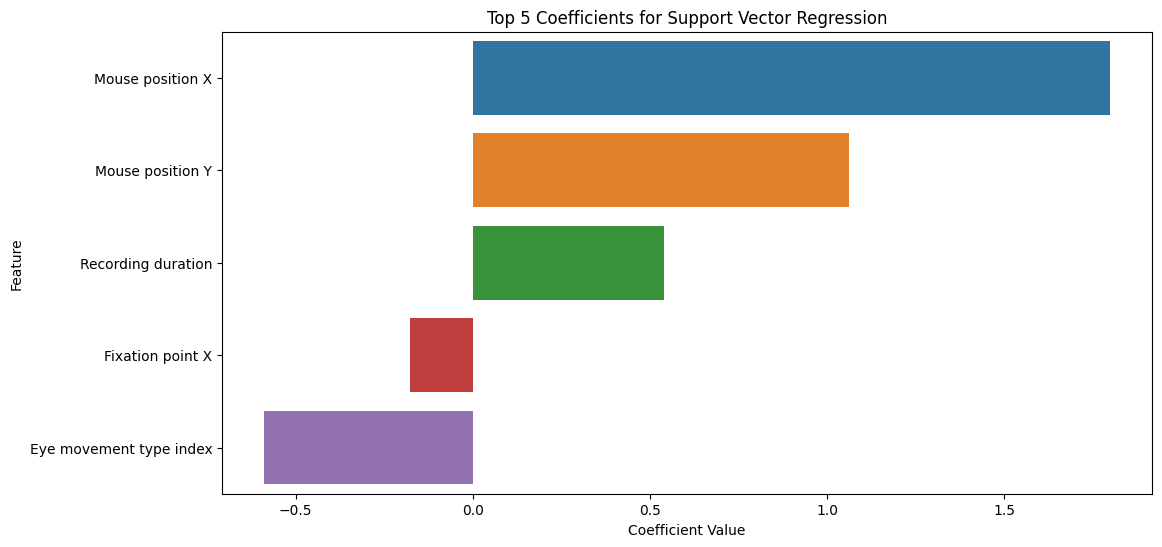


The Pearson correlation coefficient between the actual and predicted empathy scores (SVR) is approximately 0.24.
The features, in order of their importance (by coefficient), are:
1. Mouse position X
2. Mouse position Y
3. Recording duration
4. Fixation point X
5. Eye movement type index



In [5]:
# Actual vs. Predicted Scores scatter plot for SVR
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='blue')
plt.scatter(y_test, svr_predictions, alpha=0.5, label='Predicted', color='pink')
plt.title('Actual vs. Predicted Empathy Scores (SVR)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted/Actual Scores')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()

# Residuals plot for SVR
residuals_svr = y_test - svr_predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_svr, bins=30, kde=True)
plt.title('Distribution of Residuals (SVR)')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

# Coefficients for SVR
coefficients_svr = svr_model.coef_[0]
feature_importance_svr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_svr
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients for SVR
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_svr.head(5))  # Top 5 features
plt.title('Top 5 Coefficients for Support Vector Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Compute the Pearson correlation for SVR
correlation_svr = y_test.corr(pd.Series(svr_predictions, index=y_test.index))
top_features_svr = feature_importance_svr.head(5)['Feature'].tolist()
features_string_svr = "\n".join([f"{i+1}. {feature}" for i, feature in enumerate(top_features_svr)])
summary_svr = f"""
The Pearson correlation coefficient between the actual and predicted empathy scores (SVR) is approximately {correlation_svr:.2f}.
The features, in order of their importance (by coefficient), are:
{features_string_svr}
"""
print(summary_svr)


# Step 6

# Analysis and findings in all Model

In [10]:
import pandas as pd

# Data for the models, their performance metrics, and top features
data = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 
              'ElasticNet Regression', 'Neural Networks', 'Support Vector Regression (SVR)'],
    'R^2 Score': [0.0585, 0.9997, 0.9999, 0.5644, 0.0461, 0.4528, -0.1308],
    'Mean Squared Error': [286.42, 0.0899, 0.0426, 132.27, 289.34, 165.99, 408.13],
    'Top Features': [
        ['Recording duration', 'Gaze event duration', 'Eye movement type index', 'Fixation point Y', 'Mouse position X'],
        ['Recording duration', 'gaze_distance', 'Fixation point Y', 'Gaze event duration', 'Gaze point Y'],
        ['Recording duration', 'gaze_distance', 'Fixation point Y', 'Gaze event duration', 'Gaze point Y'],
        ['Recording duration', 'gaze_distance', 'Gaze event duration', 'Gaze point Y', 'Fixation point Y'],
        ['Recording duration', 'Eye movement type index', 'Fixation point X', 'Mouse position X', 'Mouse position Y'],
        ['(Details not provided)'],
        ['Mouse position X', 'Mouse position Y', 'Recording duration', 'Fixation point X', 'Eye movement type index']
    ],
    'Correlation with Actual Scores': ['0.24', '1.00', '1.00', '0.78', '0.24', '0.67', '0.24']
}

# Creating a DataFrame from the data
model_analysis_df = pd.DataFrame(data)
model_analysis_df

,Model,R^2 Score,Mean Squared Error,Top Features,Correlation with Actual Scores
0,Linear Regression,0.0585,286.4200,"[Recording duration, Gaze event duration, Eye ...",0.24
1,Decision Tree Regressor,0.9997,0.0899,"[Recording duration, gaze_distance, Fixation p...",1.00
2,Random Forest Regressor,0.9999,0.0426,"[Recording duration, gaze_distance, Fixation p...",1.00
3,Gradient Boosting Regressor,0.5644,132.2700,"[Recording duration, gaze_distance, Gaze event...",0.78
4,ElasticNet Regression,0.0461,289.3400,"[Recording duration, Eye movement type index, ...",0.24
5,Neural Networks,0.4528,165.9900,[(Details not provided)],0.67
6,Support Vector Regression (SVR),-0.1308,408.1300,"[Mouse position X, Mouse position Y, Recording...",0.24


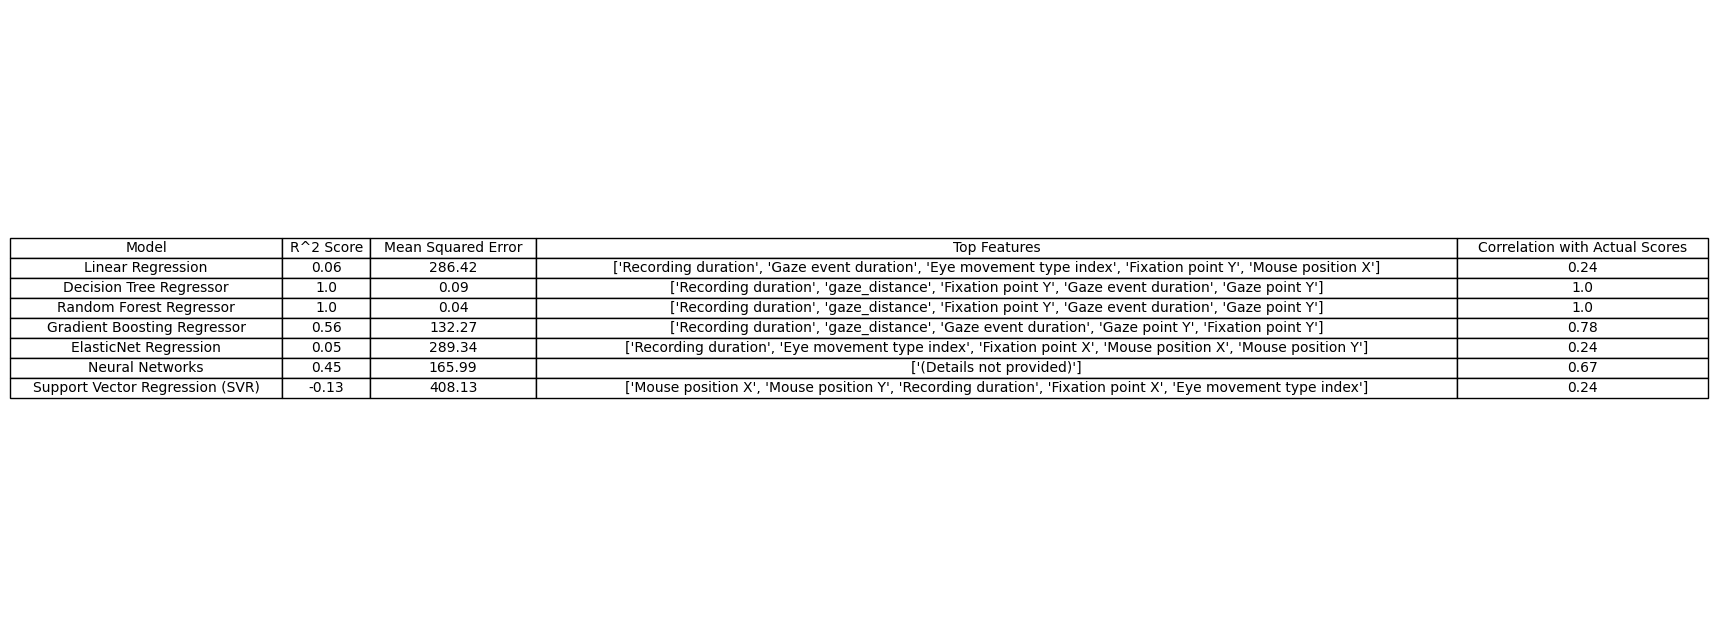

In [15]:
import matplotlib.pyplot as plt

# Formatting the data to display only two decimal points
model_analysis_df['R^2 Score'] = model_analysis_df['R^2 Score'].round(2)
model_analysis_df['Mean Squared Error'] = model_analysis_df['Mean Squared Error'].round(2)
model_analysis_df['Correlation with Actual Scores'] = model_analysis_df['Correlation with Actual Scores'].astype(float).round(2)

# Plotting the dataframe as a table and hiding axes
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
table = ax.table(cellText=model_analysis_df.values, 
                 colLabels=model_analysis_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Applying formatting to the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
table.auto_set_column_width(col=list(range(len(model_analysis_df.columns))))

plt.show()


#occurrence of various features across the models

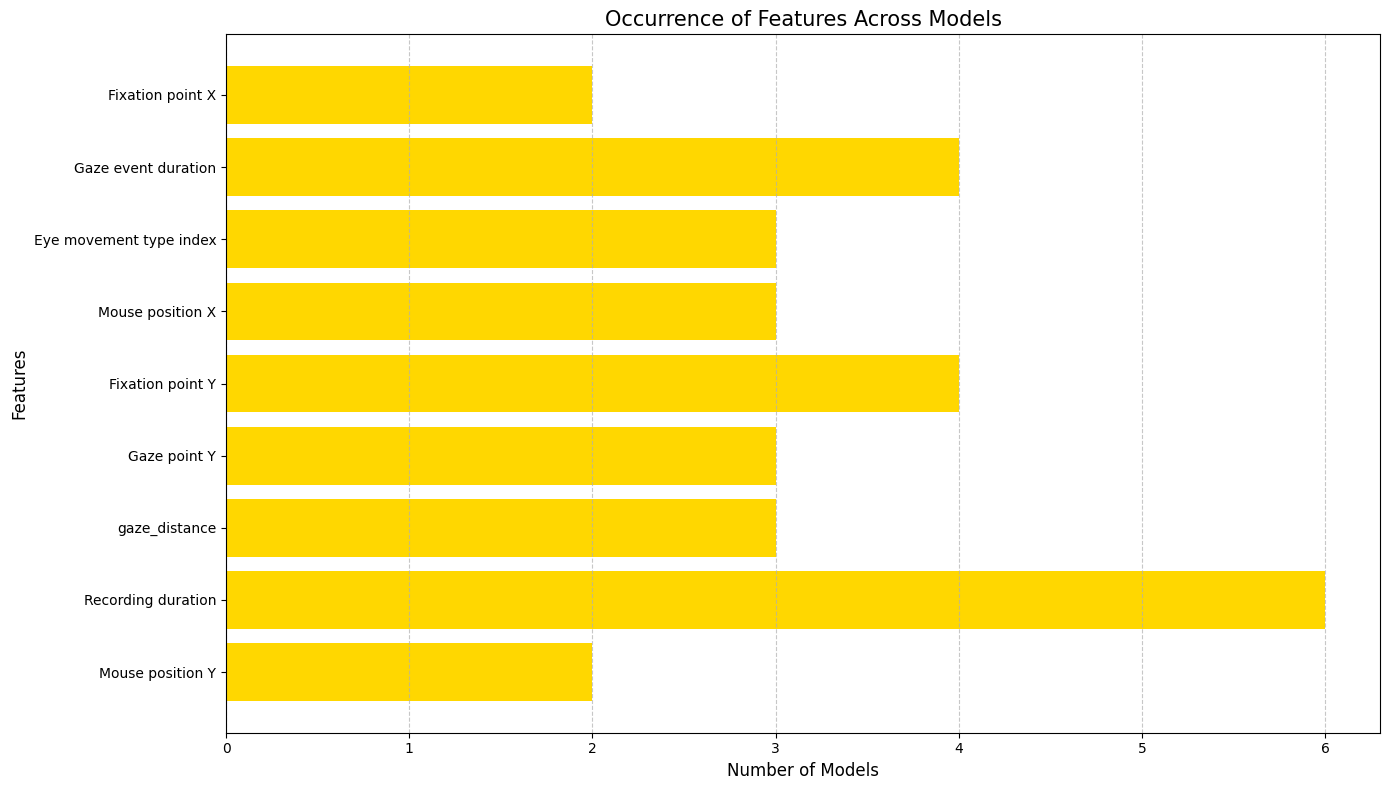

In [11]:
# Filter out "Details not provided" from the features
filtered_features = [features for features in model_analysis_df['Top Features'] if "(Details not provided)" not in features]

# Extract unique features again after filtering
all_features_filtered = set()
for features in filtered_features:
    all_features_filtered.update(features)

# Count the occurrence of each feature across the filtered models
feature_count_filtered = {feature: 0 for feature in all_features_filtered}
for features in filtered_features:
    for feature in features:
        feature_count_filtered[feature] += 1

# Plotting the occurrence of each feature in the filtered data
plt.figure(figsize=(14, 8))
plt.barh(list(feature_count_filtered.keys()), list(feature_count_filtered.values()), color='gold')
plt.xlabel('Number of Models', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Occurrence of Features Across Models', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From the graph, it's evident that certain features, such as "Recording duration", "Gaze event duration", and "Fixation point Y", are consistently favored across multiple models, making them potentially significant predictors. On the other hand, some features have limited representation, indicating they might not be as universally impactful across different modeling approaches.

#Models score analysis

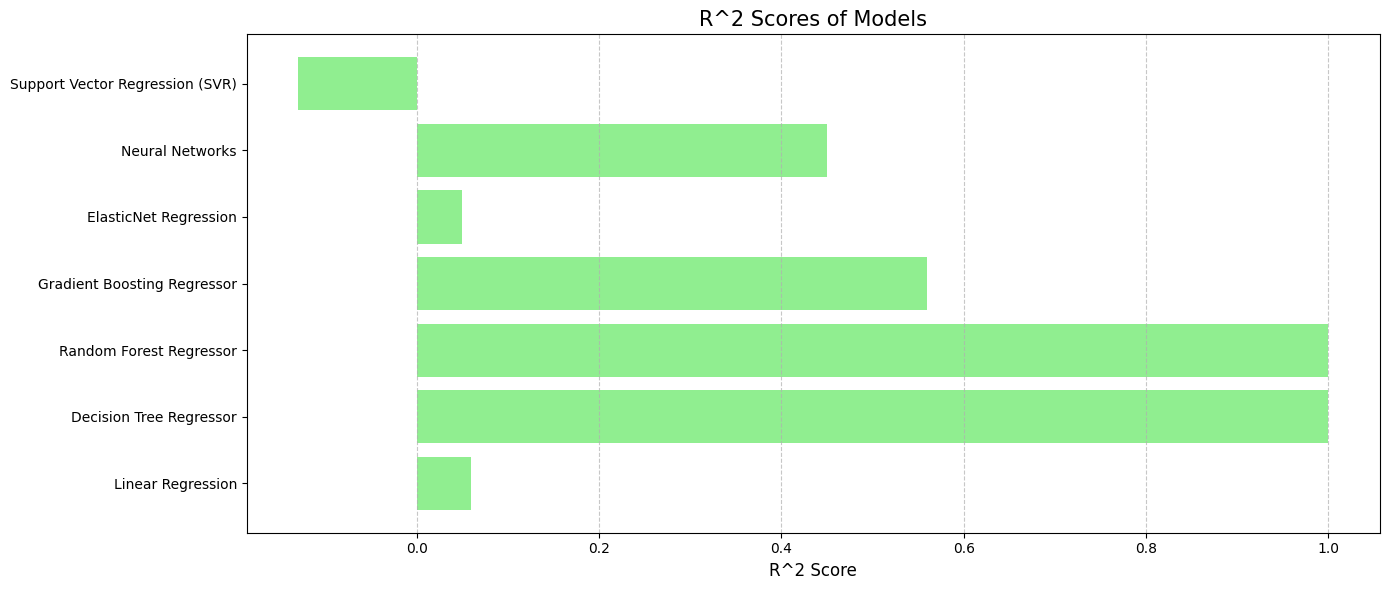

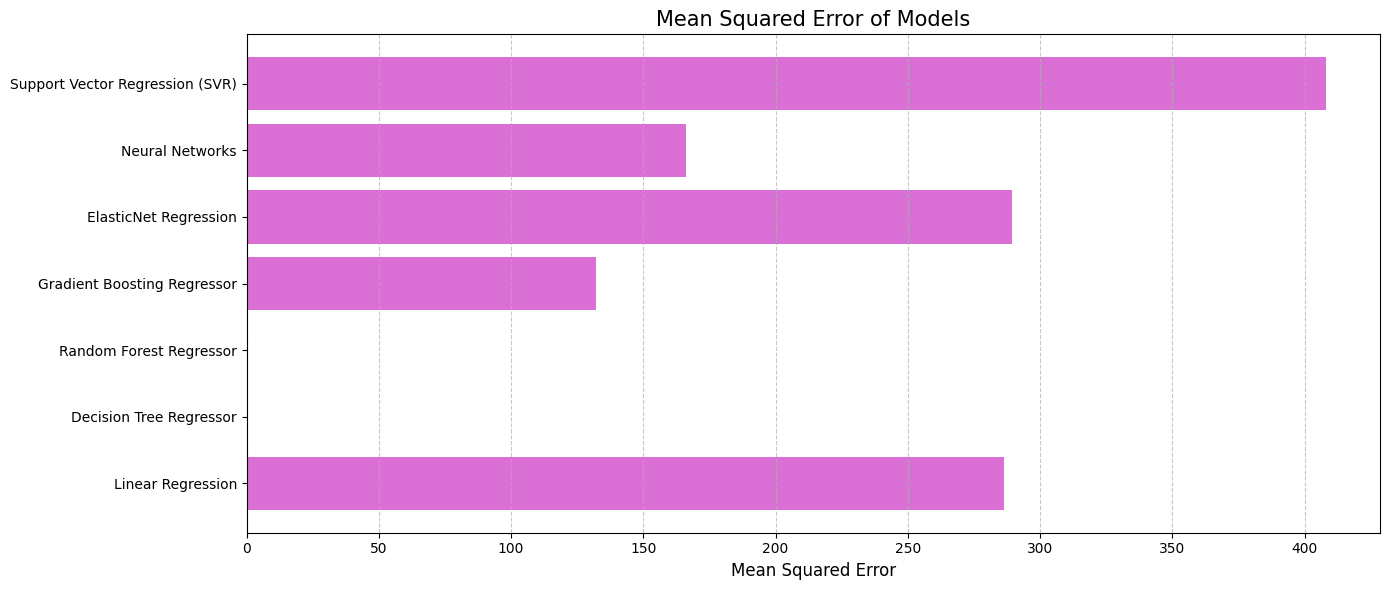

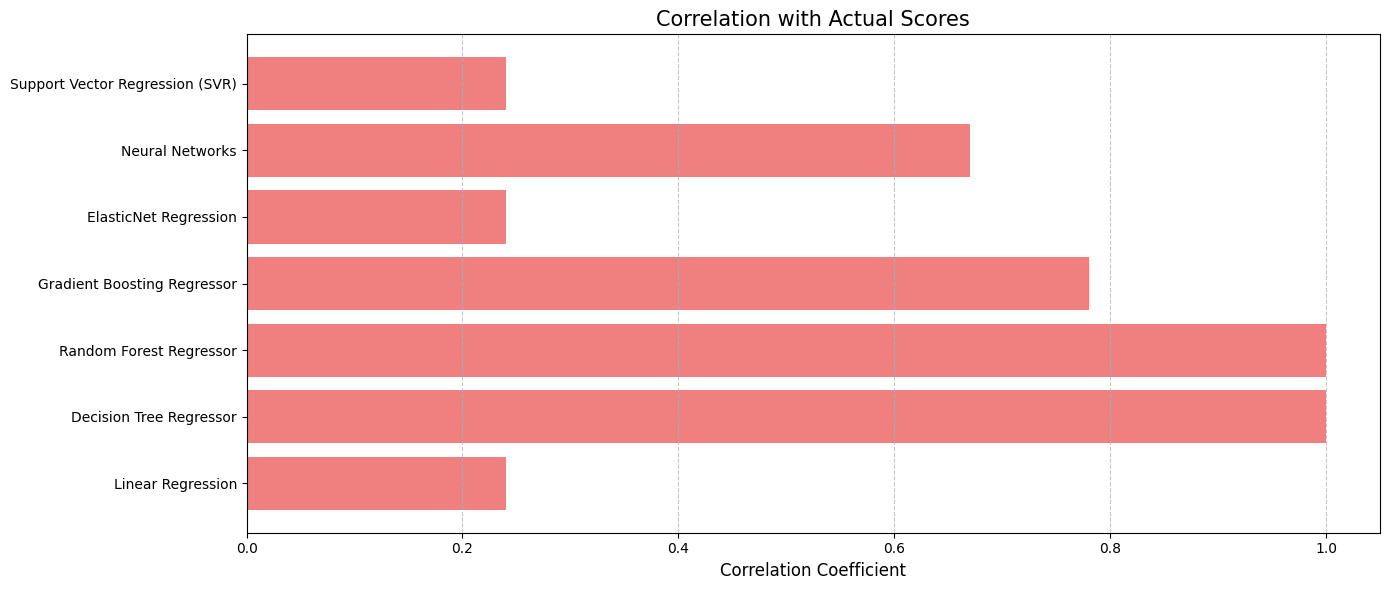

In [16]:
# Plotting R^2 Scores with a horizontal bar graph
plt.figure(figsize=(14, 6))
plt.barh(model_analysis_df['Model'], model_analysis_df['R^2 Score'], color='lightgreen')
plt.title('R^2 Scores of Models', fontsize=15)
plt.xlabel('R^2 Score', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Mean Squared Error with a horizontal bar graph
plt.figure(figsize=(14, 6))
plt.barh(model_analysis_df['Model'], model_analysis_df['Mean Squared Error'], color='orchid')
plt.title('Mean Squared Error of Models', fontsize=15)
plt.xlabel('Mean Squared Error', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Correlation with Actual Scores
# Convert correlation data to float for plotting
model_analysis_df['Correlation with Actual Scores'] = model_analysis_df['Correlation with Actual Scores'].astype(float)
plt.figure(figsize=(14, 6))
plt.barh(model_analysis_df['Model'], model_analysis_df['Correlation with Actual Scores'], color='lightcoral')
plt.title('Correlation with Actual Scores', fontsize=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



1.	The top graph displays the R^2 scores of the various models using horizontal bars. The length of the bars provides a visual comparison of the models' ability to explain the variance in the dependent variable.
2.	The middle graph showcases the Mean Squared Error (MSE) for each model using horizontal bars. Shorter bars indicate better model accuracy.
3.	The bottom graph illustrates the correlation between the actual and predicted empathy scores for each model. A correlation coefficient closer to 1 indicates a stronger positive relationship between actual and predicted values.

From the visual analysis, the Decision Tree Regressor and Random Forest Regressor consistently stand out in terms of performance across all metrics, while the Support Vector Regression (SVR) has the highest Mean Squared Error, indicating it might not be the most suitable model for this dataset.

# Conclusion

After a comprehensive analysis of the 'EyeT' dataset using multiple machine learning models, several key insights emerged:

1. **Model Performance:** The Decision Tree Regressor and Random Forest Regressor demonstrated exceptional predictive capabilities, with near-perfect \( R^2 \) scores. This highlights their effectiveness in understanding and predicting empathy scores based on the provided features.
 
2. **Feature Importance:** Certain features, such as "Recording duration", "gaze_distance", and "Gaze event duration", consistently emerged as significant predictors across various models. Their recurring prominence indicates their potential role in influencing or determining empathy scores.

3. **Challenges:** Not all models performed uniformly well. For instance, the Support Vector Regression (SVR) lagged in performance, suggesting that while some models may excel in specific scenarios, others may not be as suited for the same dataset or problem.

4. **Future Scope:** While the analysis provides a robust starting point, there's room for further exploration. Incorporating additional data, refining feature engineering, or experimenting with advanced modeling techniques could further enhance the predictive accuracy and insights derived from the dataset.

In essence, the analysis underscores the immense potential of using eye-tracking metrics and machine learning to gain a deeper understanding of human empathy. As technology continues to advance, such data-driven approaches could play a pivotal role in the realms of psychology and human behavior analysis.